## Observations and Insights

## Dependencies and starter code

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
result =combined_data_df.dtypes 
result

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
#of the tumor volume for each regimen

drug_mean = combined_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median = combined_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_variance = combined_data_df.groupby(["Drug Regimen" ])["Tumor Volume (mm3)"].var()
drug_standard = combined_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_sem = combined_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats_mean =pd.DataFrame(drug_mean)
summary_stats_median =pd.DataFrame(drug_median)
summary_stats_variance =pd.DataFrame(drug_variance)
summary_stats_std =pd.DataFrame(drug_standard)
summary_stats_sem =pd.DataFrame(drug_sem)

summary_stats =pd.DataFrame({"Mean":drug_mean,
                             "Median": drug_median,
                             "Variance": drug_variance,
                             "Standard": drug_standard,
                             "Sem": drug_sem    
})

#summary_stats.index
#summary_stats.columns
summary_stats


,Mean,Median,Variance,Standard,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

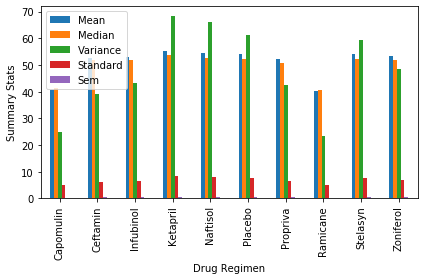

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_summary= summary_stats.plot(kind ="bar")
##summary_stats.plot.bar()



bar_summary.set_xlabel("Drug Regimen")
bar_summary.set_ylabel("Summary Stats")

plt.tight_layout()
plt.show()

# Set textual properties
#plt.title("Summary Data Points by Drug Regimen")
#plt.ylabel("Summary Stats")
#plt.xlabel("Drug Regimen")

# Set the xlabel and ylabel using class methods

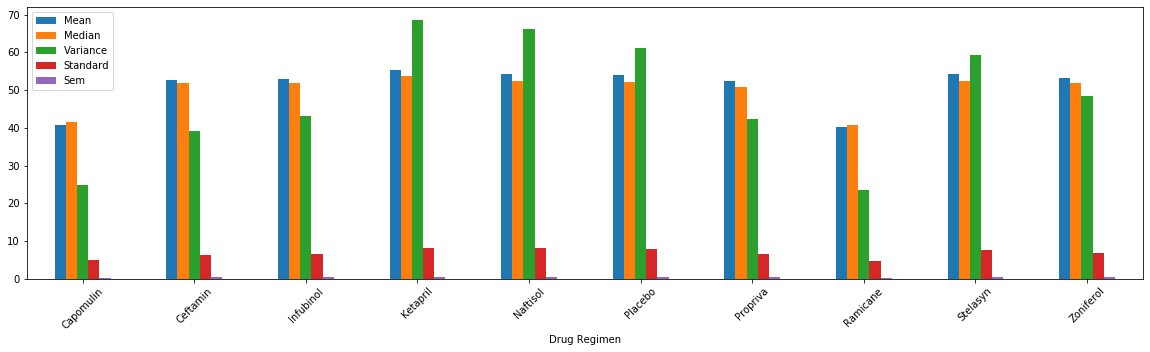

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Collect the data points columns
multi_plot = summary_stats.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(summary_stats.index, rotation=45)

plt.show()
plt.tight_layout()




## Pie plots

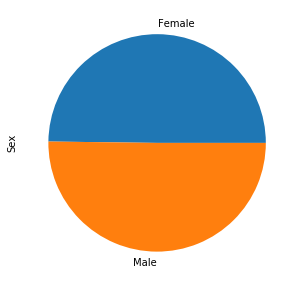

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = mouse_metadata.groupby("Sex")["Sex"].count()
                           
plot =sex_count.plot.pie(y='Sex',figsize=(5,5))

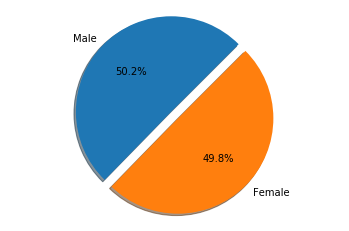

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


sex =mouse_metadata["Sex"].value_counts()
labels =mouse_metadata["Sex"].unique()
explode = (0.1, 0)

plt.pie(sex, explode=explode, labels= labels, 
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()



## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

count =mouse_metadata["Sex"].value_counts()
#ty=mouse_metadata["Sex"].unique()
#ty
count


Male      125
Female    124
Name: Sex, dtype: int64

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

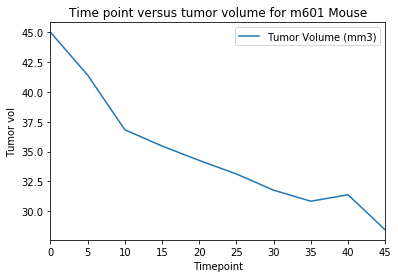

<Figure size 432x288 with 0 Axes>

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
##Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

mouse_data = combined_data_df.loc[(combined_data_df["Mouse ID"] == "m601") & (
    combined_data_df["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Timepoint","Tumor Volume (mm3)"]]


mouse_data.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line', title="Time point versus tumor volume for m601 Mouse")
#plt.xlabel("Timepoint")
plt.ylabel("Tumor vol")

plt.show()
plt.tight_layout()



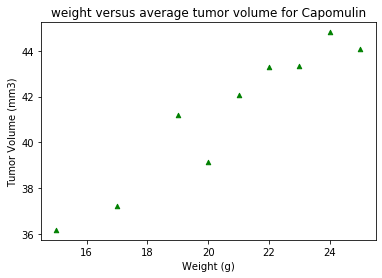

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_data = combined_data_df.loc[(combined_data_df["Drug Regimen"] == "Capomulin"),["Weight (g)","Tumor Volume (mm3)"]]
scatter_plot_w = scatter_data.groupby(["Weight (g)"])

scatter_plot= scatter_plot_w["Tumor Volume (mm3)"].mean().to_frame()

scatter_plot= scatter_plot.reset_index()

scatter_plot.plot(x ='Weight (g)', y='Tumor Volume (mm3)', kind = 'scatter', color='green', title="weight versus average tumor volume for Capomulin", marker='^')


In [105]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Weight (g),Tumor Volume (mm3))
correlation
#plt.scatter('Weight (g)','Tumor Volume (mm3)')
#plt.xlabel('Population Median Age')
#plt.ylabel('Cell Phones Per 100 People')
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.show()


SyntaxError: invalid syntax (<ipython-input-105-fa197bb1c04e>, line 2)